# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_complete.head()

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_number = mouse_data_complete['Mouse ID'].nunique()
print(mice_number)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989", :]
duplicate_mice_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_mice)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_number = clean_data['Mouse ID'].nunique()
print(clean_mice_number)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = clean_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
tumor_volume_median = clean_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
tumor_volume_variance = clean_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
tumor_volume_sd = clean_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
tumor_volume_sem = clean_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume' : tumor_volume_mean,
    'Median Tumor Volume' : tumor_volume_median,
    'Tumor Volume Variance' : tumor_volume_variance,
    'Tumor Volume Std. Dev.' : tumor_volume_sd,
    'Tumor Volume Std. Err.' : tumor_volume_sem
})

#display the dataframe
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
statistics_aggregate = clean_data.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].aggregate(["mean", "median", "var", "std", "sem"])
statistics_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

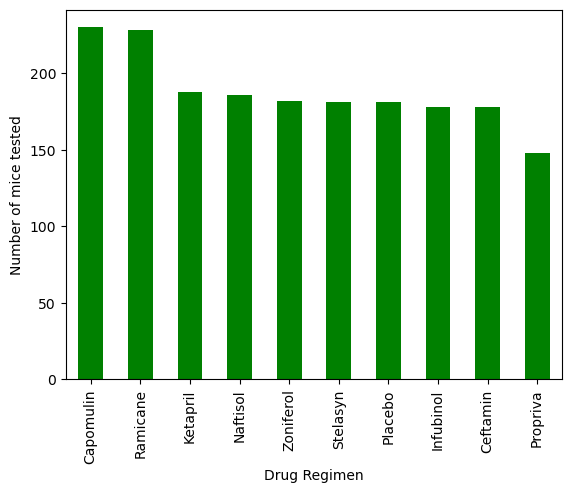

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_count = clean_data["Drug Regimen"].value_counts()
bar_plot = drug_count.plot.bar(color = "green")

#setting the labels for both axis
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")
plt.show()

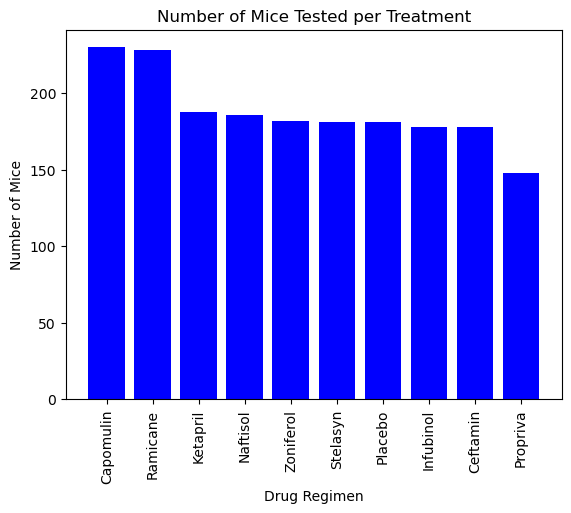

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = drug_count.index.values
y_axis = drug_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='blue', align = 'center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

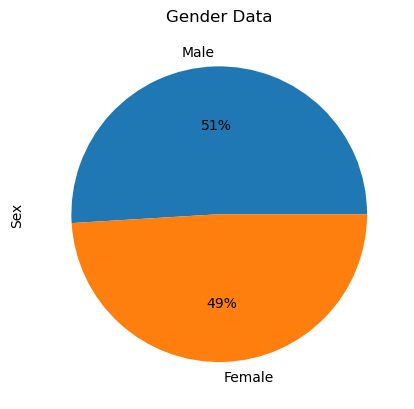

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_data["Sex"].value_counts()
gender_data.plot.pie(autopct = "%1.0f%%")

#set the title
plt.title("Gender Data")
plt.show()

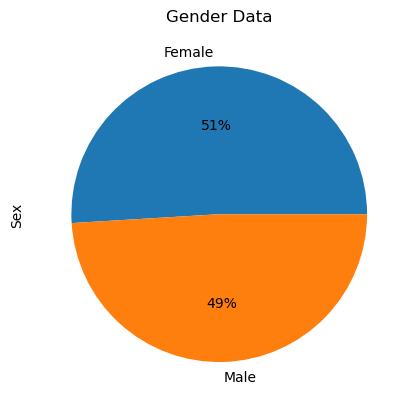

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
pie_plot = gender_data.plot.pie(autopct="%1.0f%%", labels = labels)
plt.title('Gender Data')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", :]
Ramicane_data = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
Infubinol_data = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_data = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max = mouse_data_complete.groupby("Mouse ID").max()["Timepoint"]

# create a dataframe of the data
max_timepoint_frame = pd.DataFrame(timepoint_max)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume= pd.merge(max_timepoint_frame, mouse_data_complete, on = ("Mouse ID","Timepoint"))

In [38]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatment:
    volume = tumor_volume.loc[tumor_volume["Drug Regimen"] == x]["Tumor Volume (mm3)"]
    final_tumor_volume.append(volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartile = volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
   
    # Determine outliers using upper and lower bounds
    low_bound = lower - (1.5*iqr)
    up_bound = upper + (1.5*iqr)
    outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
    print(outliers)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


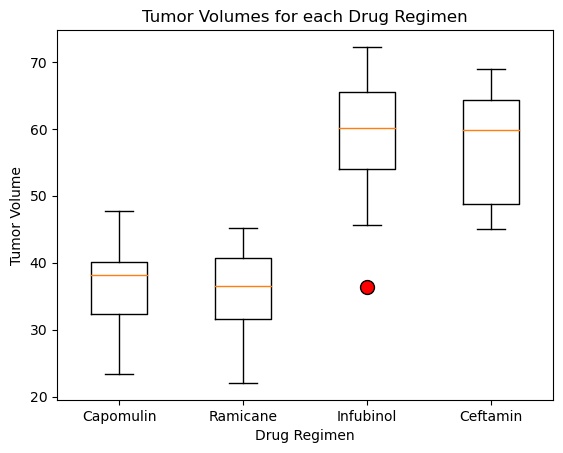

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
props = dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')
plt.boxplot(final_tumor_volume, labels = treatments, flierprops = props)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

